<h2 style="text-align: center;">
Exploring Export Financing Trends: A Data-Driven Analysis of FY25 Q3 Records
</h2>

**Step 3: Exploratory Data Analysis (EDA)**

**3.1 Univariate Analysis**

***Objective***

Conduct descriptive and exploratory analysis to uncover patterns and trends in FY25 Q3 export financing data. This involves understanding the distribution, central tendency, and variability of individual variables, supported by statistical summaries. Techniques such as groupby operations and pivot tables are applied to highlight key patterns and provide deeper insights into the dataset

***Analysis Approach***

○ Univariate Analysis – Examine each variable individually to understand distribution, central tendency, and spread.

○ Bivariate Analysis – Explore relationships between two variables (e.g., loan size vs interest rate).

○ Multivariate Analysis – Identify complex interactions among multiple variables.

○ Correlation Analysis – Quantify relationships between financial metrics.

***Key Questions to Answer***

○ **Loan Characteristics:**

- What are the typical loan sizes, durations, and interest rates?

- How do interest rates vary across loan durations?

- Are there anomalies or outliers in loan terms?

○ **Approval Behavior:**

- What is the approval vs decline ratio?

- Which countries receive the most loans and export financing?

- How do approved and disbursed amounts compare across program types?

○ **Loan Support by Ownership & Program Type:**

- How much support is directed toward women-owned, minority-owned, and small businesses?

- Which program types dominate in top countries?

○ **Global Trade & Export Patterns:**

- What are the top exported products to India?

- Which countries are the largest recipients of export financing?

***Tools Used***

○ Pandas - Data manipulation and analysis

○ Matplotlib - Static visualizations

○ Seaborn - Statistical visualizations


**Import Necessary Libraries**

In [1]:
# 3.1 Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Display options and styles
pd.set_option('display.max_columns', None)         # show all columns
pd.set_option('display.float_format', '{:.2f}'.format)  # format decimals to 2 places

plt.style.use('seaborn-v0_8-whitegrid')            # clean chart style
plt.rcParams['figure.figsize'] = (10, 6)           # default chart size
plt.rcParams['font.size'] = 12                     # default font size

sns.set_palette('husl')                            # color palette

print("All libraries imported successfully!")

All libraries imported successfully!


We import libraries for analysis and visualization:

- pandas and  numpy → data handling
  
- matplotlib and seaborn → visualization

   
- warnings → suppress unnecessary warnings
  
We also set display options and chart styles for clean outputs.
  
We can Confirm the Libraries were loaded successfully by the confirmation message.


**Loading Cleaned Dataset**

In [2]:
# 3.2 Loading Cleaned Dataset
file_path = "FY25_Q3_Cleaned.csv"   # use the file exported in Step 2
df = pd.read_csv(file_path)

print(" Cleaned dataset loaded successfully!")
print(f" Rows: {len(df):,}")
print(f" Columns: {len(df.columns)}")

 Cleaned dataset loaded successfully!
 Rows: 51,692
 Columns: 27


We load the preprocessed dataset from Step 2.  

**Dataset Details:**  

- Source: FY25_Q3_Cleaned.csv 

- Records: 51,692 rows 

- Features: ~27 columns (after dropping and renaming) 

- Status: Cleaned and ready for analysis


**3.1 Univariate Analysis**

**3.1.1 Statistical Summary of Key Variables**

Provides mean, median, min, max, and quartiles for numeric variables. 

Gives a basic picture of  loan amounts, interest rates, and durations.  


In [3]:
df[['ApprovedAmount','DisbursedAmount','InterestRate','LoanDuration']].describe()

,ApprovedAmount,DisbursedAmount,InterestRate,LoanDuration
count,51692.00,51692.00,51692.00,51692.00
mean,5022426.77,4284406.54,3.13,361.77
std,42999636.16,32536464.26,0.08,145.65
min,0.00,0.00,1.36,-1714.00
25%,200000.00,0.00,3.13,365.00
50%,500000.00,300140.28,3.13,365.00
75%,1067808.93,1513076.50,3.13,366.00
max,3595031425.00,2942953633.00,7.00,4366.00


***3.1.2. Groupby: Loan Count by Program Type***

Identifies the most frequently used loan programs.

In [4]:
df['ProgramType'].value_counts()

ProgramType
Insurance          42348
Working Capital     6155
Guarantee           2822
Loan                 367
Name: count, dtype: int64

**3.1.3 Pivot Table: Approved Amount by Fiscal Year and Country**

It gives the total approvals by year and country. Zero(0) will show for any country-year pair where no loan was approved.

In [5]:
# Create the pivot table
pivot_table = df.pivot_table(values='ApprovedAmount', index='FiscalYear', columns='Country', aggfunc='sum')
pivot_table = pivot_table.fillna(0)
pivot_table


Country,Algeria,Angola,Argentina,Aruba,Australia,Austria,Azerbaijan,Bahamas (The),Bahrain,Bangladesh,Barbados,Belgium,Belize,Benin,Bolivia,Bosnia-Herzegovina,Brazil,Bulgaria,Burma (Myanmar),Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Chile,China,Colombia,"Congo, Democratic Rep.",Costa Rica,Cote D'Ivoire,Croatia,Cyprus,Czech Republic,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,French Polynesia,Gabon,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guyana,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Laos,Latvia,Lebanon,Liberia,Libya,Lithuania,Luxembourg,Macau,Madagascar,Malawi,Malaysia,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia,Monaco,Mongolia,Morocco,Mozambique,Multiple - Countries,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Private Export Funding Corp.,Qatar,Romania,Russia,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovak Republic,Slovenia,South Africa,Spain,Sri Lanka,St. Kitts And Nevis,St. Lucia,St. Vincent And Grenadines,Suriname,Sweden,Switzerland,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicos,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Virgin Islands (British),Zambia
FiscalYear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7426163.00,8506317.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,432000.00,98000.00,0.00,437325.00,0.00,0.00,0.00,0.00,270000.00,900000.00,0.00,0.00,2410000.00,0.00,0.00,0.00,90000.00,0.00,0.00,0.00,0.00,0.00,0.00,2207392.00,490000.00,0.00,0.00,1121179.21,0.00,0.00,225000.00,0.00,0.00,0.00,4648753.83,0.00,0.00,180000.00,0.00,1800000.00,0.00,0.00,0.00,31069161.00,0.00,990000.00,0.00,0.00,0.00,0.00,0.00,0.00,6895089.00,270000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,176949545.26,0.00,0.00,0.00,0.00,0.00,190685000.00,0.00,0.00,225000.00,0.00,0.00,2381506.00,0.00,0.00,0.00,468279371.00,0.00,0.00,0.00,0.00,6224085.87,0.00,0.00,270000.00,74500000.00,0.00,0.00,7357686.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,270000.00,0.00,0.00,0.00,0.00,0.00,405000.00,0.00,0.00,0.00,0.00,270000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13169189.20,0.00,90000.00,129921854.56,507105.00,0.00,0.00,0.00,0.00
2007,723105.00,0.00,17217457.00,0.00,360000.00,106567959.50,24153747.42,0.00,0.00,0.00,523677.00,270000.00,0.00,0.00,0.00,0.00,410940665.27,0.00,0.00,0.00,0.00,1165013.00,948496786.00,0.00,212164008.52,11403675.00,30013548.50,0.00,31426693.55,0.00,45000.00,0.00,0.00,522000.00,34788812.92,0.00,0.00,11171058.00,0.00,0.00,0.00,0.00,0.00,0.00,180000.00,0.00,0.00,0.00,49279930.58,109533785.00,1044000.00,0.00,8176888.15,0.00,274525.13,3727380.00,405000.00,0.00,0.00,1397348958.57,0.00,0.00,615654224.50,231067763.67,142200.00,19365685.30,900000.00,72000.00,153123360.22,114400636.62,243254577.20,0.00,0.00,0.00,0.00,90000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,978817802.86,0.00,0.00,0.00,88555053.00,0.00,3134430000.00,0.00,90000.00,0.00,3560749.27,0.00,118564031.69,0.00,0.00,0.00,0.00,0.00,82975140.19,0.00,1677605.30,34624337.39,10624040.27,0.00,0.00,136250000.00,0.00,0.00,160681194.60,605471000.00,0.00,0.00,0.00,610633033.00,0.00,0.00,9775000.00,0.00,24321023.68,0.00,129920.93,0.00,450000.00,0.00,270000.00,0.00,0.00,0.00,1305784.83,0.00,0.00,0.00,167213818.21,0.00,1038000.00,0.00,63496398.77,247379065.03,1832685.00,1552401468.69,1500407.00,0.00,0.00,0.00,0.00
2008,0.00,0.00,38901029.33,0.00,377461551.00,0.00,2273946.24,299438.00,0.00,0.00,749999.70,49500.00,0.00,0.00,0.00,0.00,695669818.56,0.00,0.00,0.00,0.00,0.00,42

**3.1.4. Central Tendency (Mean, Median, Mode)**

Mean: average loan size

Median: middle loan size

Mode: most common loan size

In [6]:
print(df['ApprovedAmount'].mean())
print(df['ApprovedAmount'].median())
print(df['ApprovedAmount'].mode()[0])

5022426.774610384
500000.0
500000.0


**3.1.5. Loan Duration Distribution**

Shows typical loan durations.

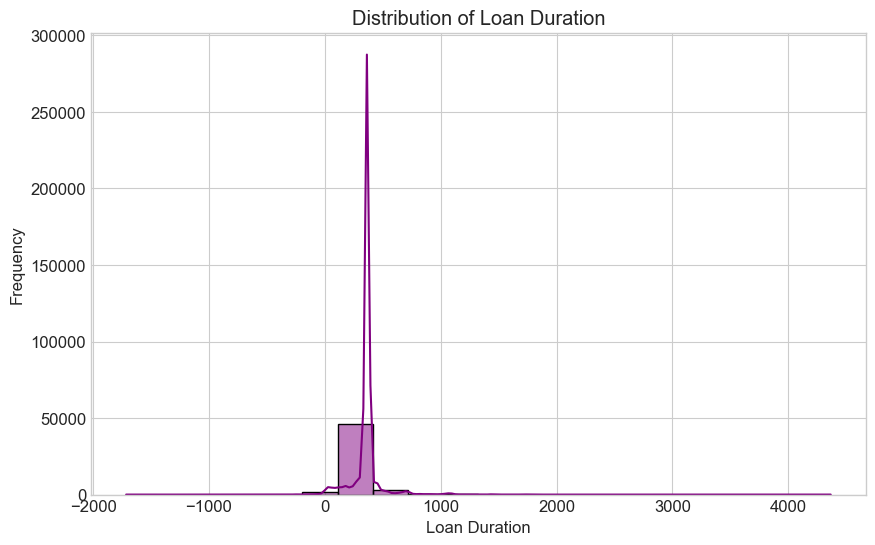

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['LoanDuration'], bins=20, kde=True, color='purple')
plt.title("Distribution of Loan Duration")
plt.xlabel("Loan Duration")
plt.ylabel("Frequency")
plt.show()

- Most loans have short durations, clustered around small positive values.
    
- The distribution is highly skewed, with a sharp peak at the lower end.

- Outliers exist: negative durations (errors) and very long durations (unusual terms).

Most financing deals are short‑term, but the presence of extreme values suggests the need for separate analysis of long‑term loans.

**3.1.6. Interest Rate Distribution**

Displays common interest ranges.

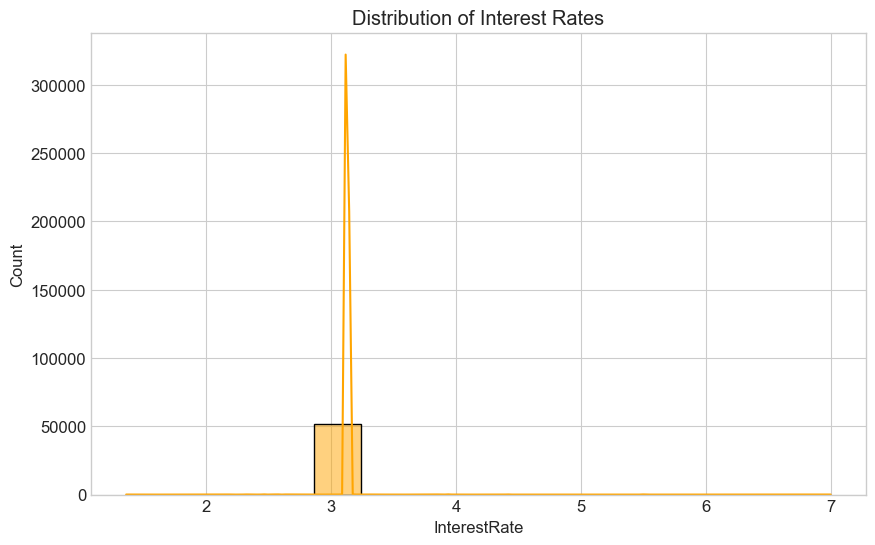

In [8]:
sns.histplot(df['InterestRate'], bins=15, kde=True, color='orange')
plt.title("Distribution of Interest Rates")
plt.show()

The histogram shows that most loans have interest rates clustered around ~3%, forming a sharp peak.

The distribution is highly concentrated, with very few loans above 4%.

This suggests that the majority of financing deals are offered at a standardized low interest rate, while higher rates are rare.

The consistency around 3% indicates stable lending practices, but the lack of variation may limit flexibility for different borrower risk profiles.

**3.1.7 Loan Count by Country**

It compares loan activity across countries.


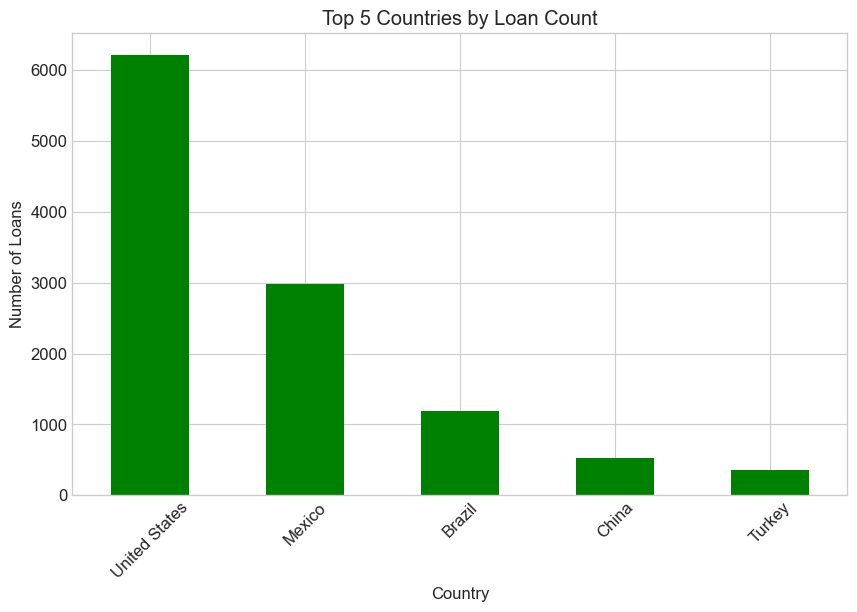

In [9]:
df_country_only = df[df['Country'] != 'Multiple - Countries']

top5 = df_country_only['Country'].value_counts().head(5)

top5.plot(kind='bar', color='green')
plt.title("Top 5 Countries by Loan Count")
plt.xlabel("Country")
plt.ylabel("Number of Loans")
plt.xticks(rotation=45)
plt.show()

 The United States dominates loan distribution, with the highest count.
 
Mexico comes second, while Brazil, China, and Turkey have much fewer loans.

Most loans are in the U.S., while other countries have fewer, showing reliance on one market and chances to grow elsewhere.


**3.1.8 Loan Count by Fiscal Year**

It shows loan activity trends over time.

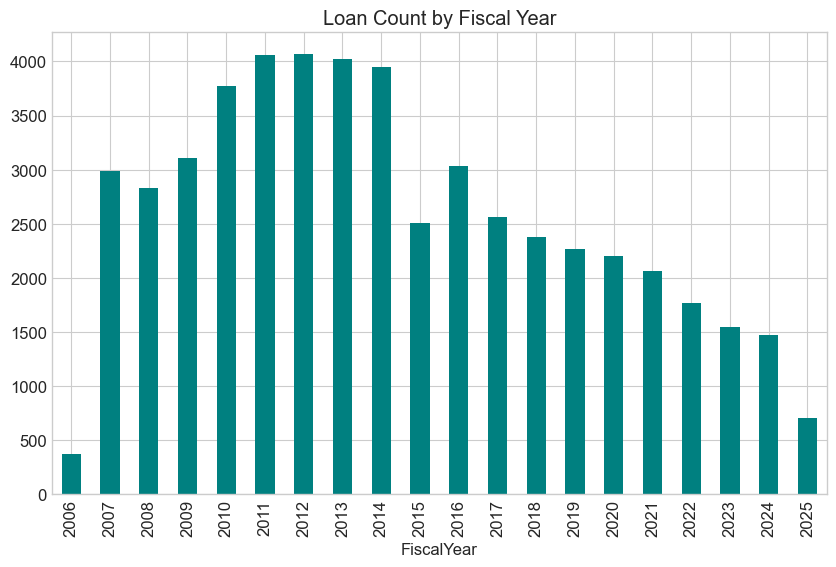

In [10]:
df['FiscalYear'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title("Loan Count by Fiscal Year")
plt.show()

Loan counts grew steadily from 2006, reaching a peak around 2011–2013.

After 2013, there is a clear downward trend, with only small fluctuations (e.g., a brief rise in 2016).

By 2025, loan counts fall below 1,000, showing a sharp decline in recent years.

Loan activity was strong in the early 2010s but has weakened over the last decade, suggesting reduced demand or tighter lending policies

**3.1.9 Correlation Analysis**

Reveals relationships between approval, disbursement, interest rate, and duration.

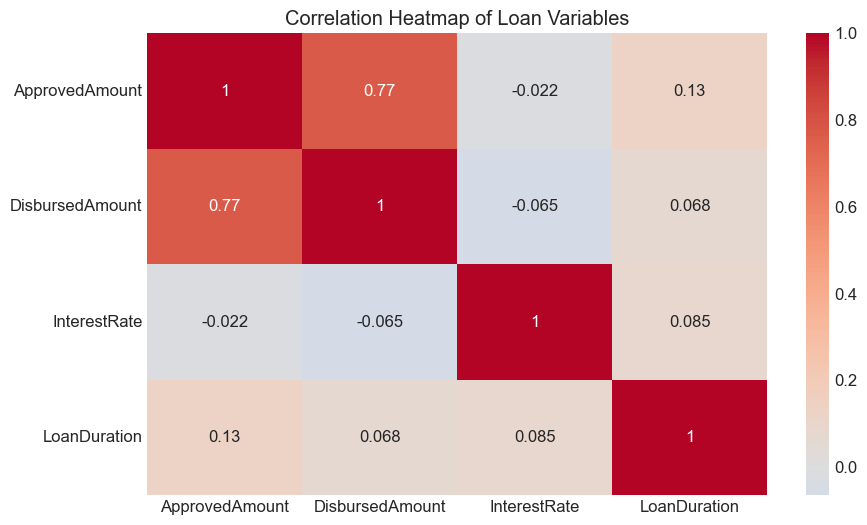

In [11]:
corr = df[['ApprovedAmount','DisbursedAmount','InterestRate','LoanDuration']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Loan Variables")
plt.show()

ApprovedAmount and DisbursedAmount show a strong positive correlation (0.77) → larger approved loans usually lead to larger disbursed amounts.

ApprovedAmount and LoanDuration have a weak positive correlation (0.13) → slightly longer loans tend to have higher approved amounts, but the relationship is not strong.

InterestRate has very weak or near‑zero correlations with all other variables → interest rates are largely independent of loan size or duration.

Loan approvals and disbursements (actual release or payment of money) go hand in hand, but interest rates are decided separately, based on policy instead of loan details.

**3.1.10 Women-Owned vs Minority-Owned Loans**

Compares average loan amounts for women-owned and minority-owned businesses.

In [12]:
df[['WomenOwnedAmount','MinorityOwnedAmount','ApprovedAmount']].mean()

WomenOwnedAmount        83615.26
MinorityOwnedAmount    135622.12
ApprovedAmount        5022426.77
dtype: float64

Here we can see that  Overall approved average amount of 5.2 Million,
- Women-owned average loan: ~83,615  
- Minority-owned average loan: ~135,622  
  
Loans to women and minority-owned businesses are much smaller than overall approvals, showing scope for more inclusive financing.

**3.1.11 India-Specific Loan Analysis**

Provides India’s loan statistics for comparison with other countries.

In [13]:
india_df = df[df['Country'] == 'India']
india_df[['ApprovedAmount','DisbursedAmount','InterestRate','LoanDuration']].describe()

,ApprovedAmount,DisbursedAmount,InterestRate,LoanDuration
count,302.00,302.00,302.00,302.00
mean,34352454.66,25134951.47,3.17,384.92
std,149336156.07,88900504.81,0.24,286.95
min,0.00,0.00,2.55,-252.00
25%,90000.00,0.00,3.13,270.00
50%,301233.50,165700.07,3.13,365.00
75%,4349370.00,2920670.12,3.13,366.00
max,1905770039.00,813013081.30,4.40,1441.00


- 302 loan records for India  
- Average approved: ~34.3M, average disbursed: ~25.1M  
- Interest rate: ~3.17% (stable)  
- Loan duration: wide range
                  
 India receives large approvals with steady interest rates, but disbursements are smaller.

**3.2 Bivariate Analysis**

**3.2.1 Disbursed Amount vs Approved Amount**

Reveals consistency or gaps between approved and disbursed loans.

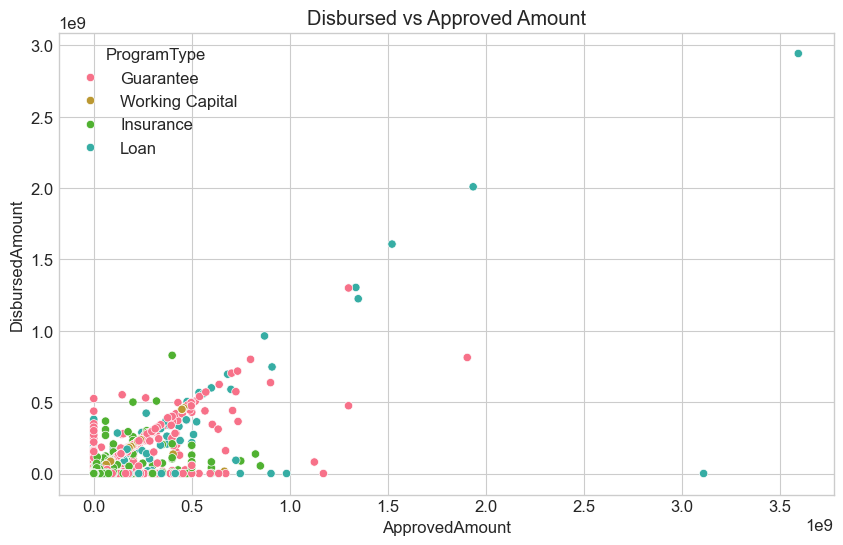

In [14]:
sns.scatterplot(x='ApprovedAmount', y='DisbursedAmount', data=df, hue='ProgramType')
plt.title("Disbursed vs Approved Amount")
plt.show()

 Higher approvals usually leads to higher disbursements.  
 
Most loans are small.
  
A few very large loans stand out.  

overall financing is dominated by many small loans, with a few big ones making a big impact.


**3.2.2 Women-Owned vs Minority-Owned Loan Amounts**

Compares loan support levels for women-owned vs minority-owned businesses.

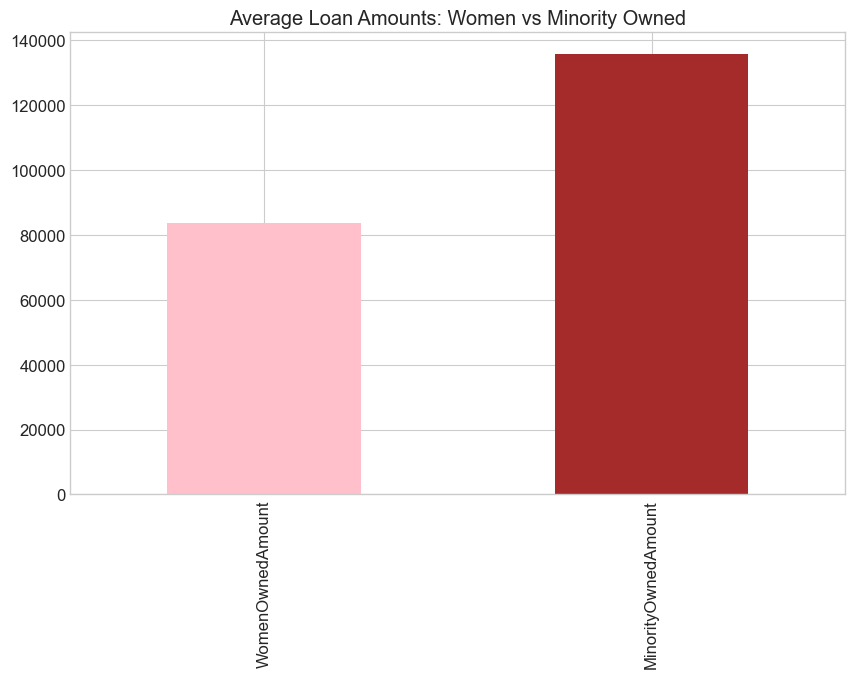

In [15]:
ownership_means = df[['WomenOwnedAmount','MinorityOwnedAmount']].mean()
ownership_means.plot(kind='bar', color=['pink','brown'])
plt.title("Average Loan Amounts: Women vs Minority Owned")
plt.show()

Women-owned average loan: ~85K

Minority-owned average loan: ~135K  

Both are much smaller than overall loan approvals.

Loans for women and minority-owned businesses are supported, but amounts are relatively limited compared to the wider market.

**3.3 Multivariate Analysis**

**3.3.1 Boxplot: Approved Amount by Program Type and Country**

Shows spread and outliers in loan approvals across programs and top 5 countries.

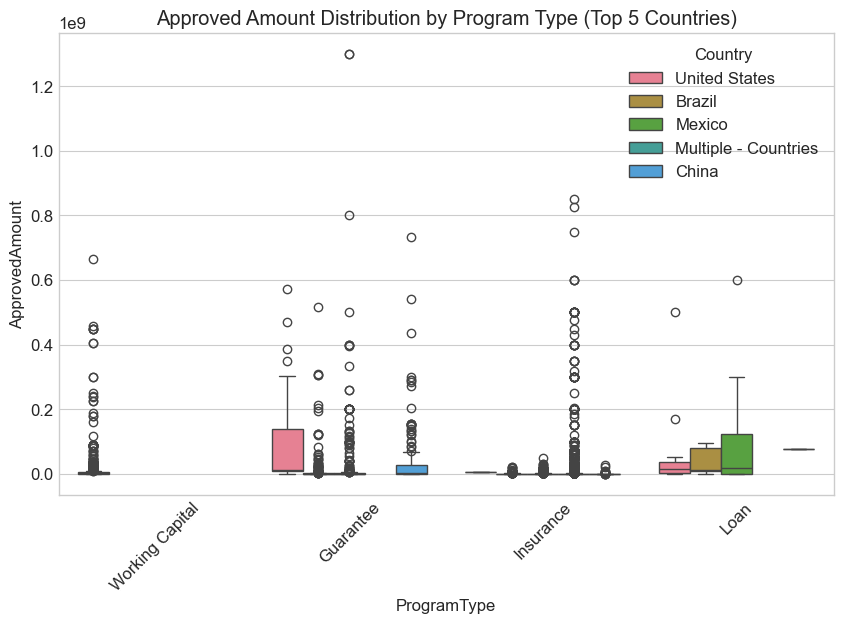

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Find top 5 countries by loan count
top5_countries = df['Country'].value_counts().head(5).index

# Step 2: Filter dataset to include only those countries
df_top5 = df[df['Country'].isin(top5_countries)]

# Step 3: Boxplot for top 5 countries
sns.boxplot(x='ProgramType', y='ApprovedAmount', hue='Country', data=df_top5)
plt.title("Approved Amount Distribution by Program Type (Top 5 Countries)")
plt.xticks(rotation=45)
plt.show()

Approved amounts vary across program types  (Working Capital, Guarantee, Insurance, Loan).  

The U.S. has the higher loan approvals.  

Other countries like Brazil, Mexico, and China have smaller amounts.

Some large deals appear as outliers.
  
Most big approvals come from the U.S., while other countries handle smaller loans.

**Step 4: Visualizations**

**4.1 Decision Status Distribution**

Decision Status Distribution is a way of showing how the loan applications in the dataset were decided — whether they were approved or declined.

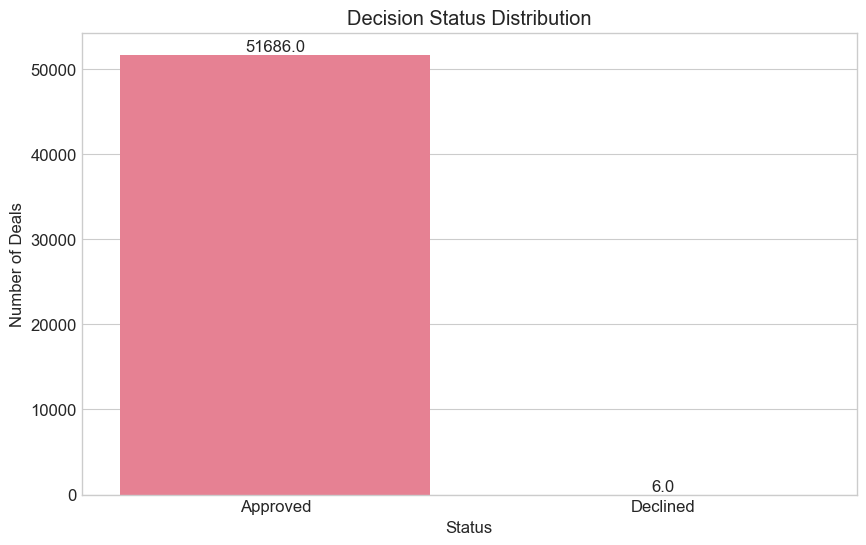

In [18]:
ax = sns.countplot(x='DecisionStatus', data=df)
plt.title("Decision Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Deals")

# Add labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

plt.show()

Almost all deals are approved (over 51,000).

Only a handful are declined (just 6).

The dataset shows a very strong approval trend, with very few rejections. It indicating strong institutional support for exporters.

**4.2. Approved Amount Distribution**

This is the size of the loan or financing that was approved for each deal in the dataset.

X-axis (Approved Amount):  Represents the size of each approved loan, ranging from 0 up to around 3.5 billion.

Y-axis (Frequency): Shows how many loans fall into each amount range (bin).



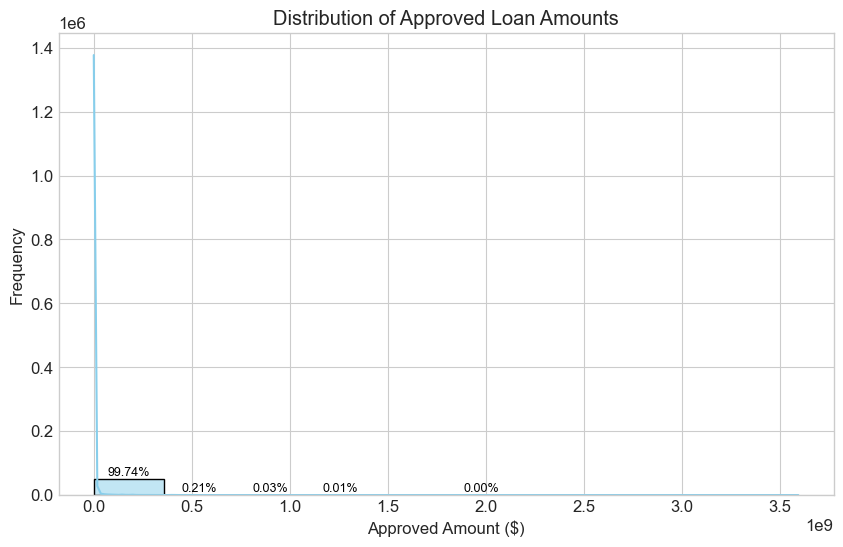

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histogram
ax = sns.histplot(df['ApprovedAmount'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Approved Loan Amounts")
plt.xlabel("Approved Amount ($)")
plt.ylabel("Frequency")

# Total number of loans
total = len(df)

# Sort bars by height and label only top 5
top_patches = sorted(ax.patches, key=lambda p: p.get_height(), reverse=True)[:5]

for p in top_patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.show()

Most loans are approved for small amounts.

A very high percentage (over 99%) of approvals fall in the lowest range.

Only a tiny fraction of loans are approved for very large amounts.

Financing is dominated by small loans, while very large approvals are rare but impactful. The financing strategy favors many small exporters than large deals.

**4.3 Yearly Trend of Approved Amounts**

It shows how the total approved loan amounts change year by year and also helps to identify long-term financing patterns, growth, or decline in approvals.

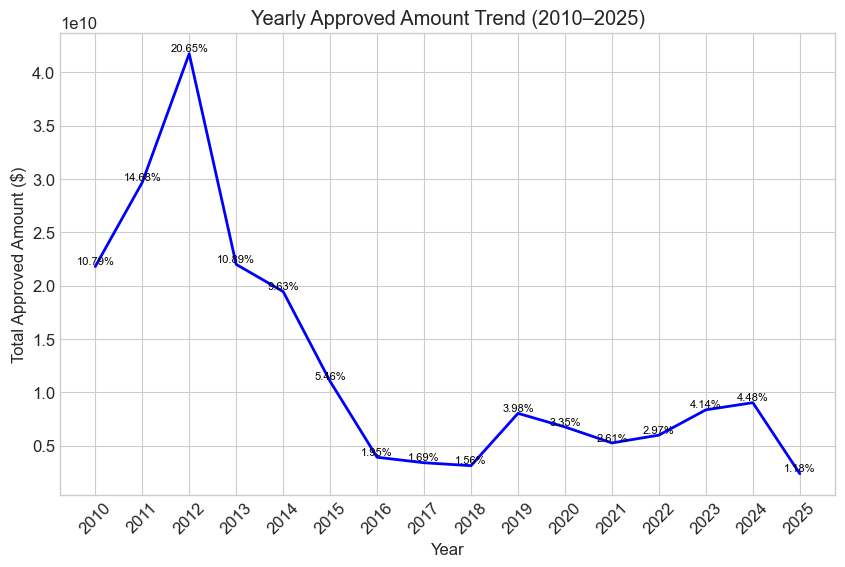

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert DecisionDate to datetime
df['DecisionDate'] = pd.to_datetime(df['DecisionDate'], errors='coerce')

# Extract year as integer
df['DecisionYear'] = df['DecisionDate'].dt.year.astype(int)

# Group by year and sum ApprovedAmount
yearly = df.groupby('DecisionYear')['ApprovedAmount'].sum().sort_index()

# Filter only 2010 to 2025
yearly_filtered = yearly[(yearly.index >= 2010) & (yearly.index <= 2025)]

# Calculate total for percentage conversion
total = yearly_filtered.sum()

# Plot clean line chart
ax = yearly_filtered.plot(kind='line', color='blue', linewidth=2)
plt.title("Yearly Approved Amount Trend (2010–2025)")
plt.xlabel("Year")
plt.ylabel("Total Approved Amount ($)")
plt.grid(True)

# Format x-axis ticks
ax.set_xticks(yearly_filtered.index)
ax.set_xticklabels(yearly_filtered.index.astype(str), rotation=45)

# Add percentage labels
for x, y in zip(yearly_filtered.index, yearly_filtered.values):
    pct = (y / total) * 100
    ax.text(x, y, f"{pct:.2f}%", ha='center', va='bottom', fontsize=8, color='black')

plt.show()

Approvals grew in the early 2010s, then started to reduce after 2013.  

A sharp dip in 2020–2021 reflects the impact of COVID‑19.  

This chart shows how the total approved loan amounts changed year by year from 2010 to 2025, and the dip around 2020–2021 is likely related to the economic impact of COVID-19 on loan approvals. Approval volumes dropped sharply during the pandemic, and then it slowly recovered in later years.but dipped again in 2025.

**4.4 Decision Authority Breakdown**

This will shows who made the financing decisions in the dataset and it reveals a very strong concentration of decision-making power.


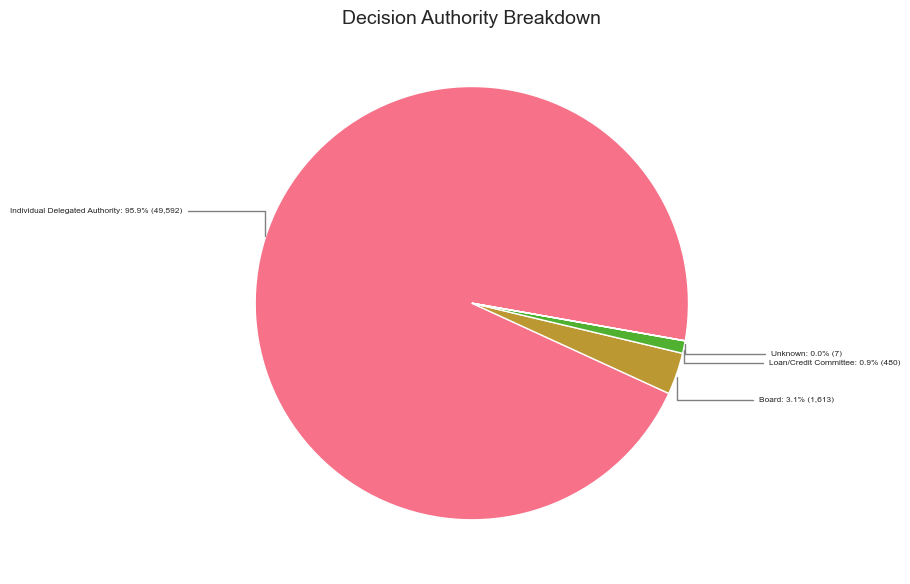

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
values = df['DecisionAuthority'].value_counts()
labels = values.index
sizes = values.values
total = sum(sizes)

# Format labels as "Label: 95.9% (49,592)"
formatted_labels = [f"{label}: {size/total*100:.1f}% ({size:,})" for label, size in zip(labels, sizes)]

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts = ax.pie(
    sizes,
    labels=None,          # no labels inside
    startangle=350,
    wedgeprops=dict(edgecolor='white')
)

# Add external labels with connector lines
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    horizontal_alignment = 'left' if x > 0 else 'right'
    connectionstyle = "angle,angleA=0,angleB=90"
    ax.annotate(formatted_labels[i],
                xy=(x, y),
                xytext=(1.4*x, 1.4*y),   # position outside
                horizontalalignment=horizontal_alignment,
                fontsize=6,
                arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='gray'))

plt.title("Decision Authority Breakdown", fontsize=14)
plt.tight_layout()
plt.show()

Decision Authority Breakdown as follows:

Individual Delegated Authority: 96.5%  

Board: 3.1%  

Loan/Credit Committee: 0.95%  

Unknown: 0.0%

Decisions are mostly centralized under individual authority, with limited involvement from boards or committees.

**4.5 Top 10 Countries by Approved Amount**

This will shows the 10 countries that received the highest total export financing, based on the sum of the ApprovedAmount column in the dataset.

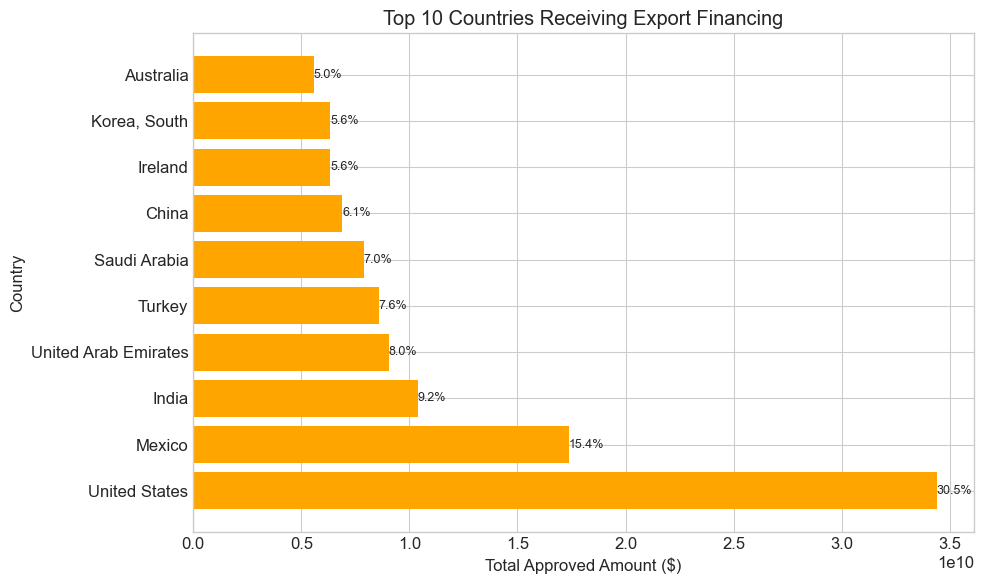

In [22]:
import matplotlib.pyplot as plt

# Step 1: Remove "Multiple - Countries"
filtered_df = df[df['Country'] != 'Multiple - Countries']

# Step 2: Group and get top 10 countries by approved amount
top_countries = filtered_df.groupby('Country')['ApprovedAmount'].sum().nlargest(10)

# Step 3: Calculate total for percentage labels
total_amount = top_countries.sum()
percentages = (top_countries / total_amount) * 100

# Step 4: Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_countries.index, top_countries.values, color='orange')

# Step 5: Add percentage labels to each bar
for bar, pct in zip(bars, percentages):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2,
            f'{pct:.1f}%', va='center', ha='left', fontsize=9)

# Step 6: Add titles and labels
plt.title("Top 10 Countries Receiving Export Financing")
plt.xlabel("Total Approved Amount ($)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

U.S. leads with 30.5% of financing. 

Mexico (15.4%) and India (9.2%) are next.  

UAE, Turkey, and Saudi Arabia together hold ~23%.  

China, Ireland, Korea, and Australia each get 5–6%.

Export financing is concentrated in the U.S., while other countries share smaller but meaningful portions.

**4.6 Top 10 Products Exported**



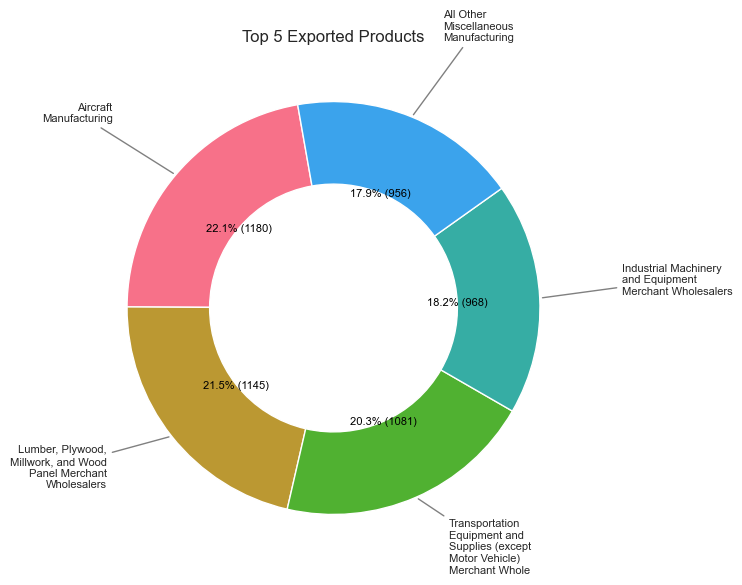

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Clean and prepare data
df_clean = df[df['ProductDescription'].str.lower() != 'unknown']
top_products = df_clean['ProductDescription'].value_counts().nlargest(5)
labels = top_products.index
sizes = top_products.values
total = sum(sizes)

# Wrap long labels for external display
wrapped_labels = [textwrap.fill(label, width=20) for label in labels]

# Create donut chart
fig, ax = plt.subplots(figsize=(8, 6))  # Bigger canvas
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct=lambda pct: f"{pct:.1f}% ({int(round(pct*total/100))})",
    startangle=100,
    wedgeprops=dict(width=0.4, edgecolor='white'),
    textprops=dict(color="black", fontsize=8)
)

# External labels with connector lines
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    ha = 'left' if x > 0 else 'right'
    ax.annotate(wrapped_labels[i],
                xy=(x, y),
                xytext=(1.4*x, 1.4*y),
                horizontalalignment=ha,
                fontsize=8,
                arrowprops=dict(arrowstyle="-", color='gray'))

plt.title("Top 5 Exported Products", fontsize=12)
plt.tight_layout()
plt.show()

With 22.1% of deals (1,180), Aircraft Manufacturing is the top exported product. This suggests strong demand or strategic investment in aviation exports.

Three categories are variations of Merchant Wholesalers:

- Lumber, Plywood, Millwork, and Wood Panel: 21.7% (1,174)

- Transportation Equipment and Supplies: 20.5% (1,081)

- Industrial Machinery and Equipment: 17.9% (945)

Export activity is fairly balanced across these top five categories, with no single product dominating. Aircraft manufacturing has a slight edge, but wood products and machinery also play major roles, showing a diversified export portfolio.

**4.7 Support for Diverse Businesses by Country**

It refers to how different nations allocate financial support to businesses that are:

- Women-Owned

- Minority-Owned

- Small Businesses

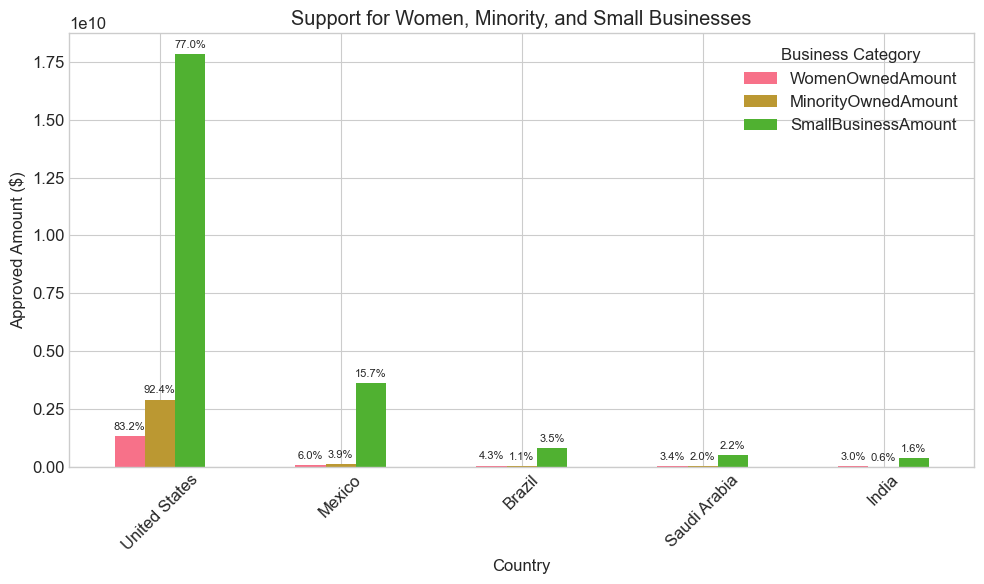

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Exclude 'Multiple - Countries'
filtered_df = df[df['Country'] != 'Multiple - Countries']

# Step 2: Group and sum support categories
support = filtered_df.groupby('Country')[['WomenOwnedAmount','MinorityOwnedAmount','SmallBusinessAmount']].sum()

# Step 3: Select top 5 countries by WomenOwnedAmount
support = support.nlargest(5, 'WomenOwnedAmount')

# Step 4: Calculate total for each category
totals = support.sum()

# Step 5: Plot grouped bar chart
ax = support.plot(kind='bar', figsize=(10, 6))
plt.title("Support for Women, Minority, and Small Businesses")
plt.xlabel("Country")
plt.ylabel("Approved Amount ($)")
plt.legend(title="Business Category")
plt.xticks(rotation=45)

# Step 6: Add percentage labels above each bar
for container in ax.containers:
    category = container.get_label()
    total = totals[category]
    for bar in container:
        height = bar.get_height()
        if height > 0:
            percent = (height / total) * 100
            ax.annotate(f'{percent:.1f}%', 
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

U.S. leads in all three categories.  

Small Business support is the largest share (~77%).  

Women-owned and Minority-owned support in the U.S. are also dominant (>80% and >90%). 

Mexico shows some support for small businesses (~15.7%), others are much smaller.  

Financial support is heavily concentrated in the U.S., especially for small businesses, while other countries play a much smaller role. This highlights both U.S. dominance and the potential to expand inclusivity globally.
                                                                                               

**4.8 Share of Minority-Owned, Women-Owned, and Small Business Financing in India**

 This will shows how much each category contributes relative to the total approved financing for India.

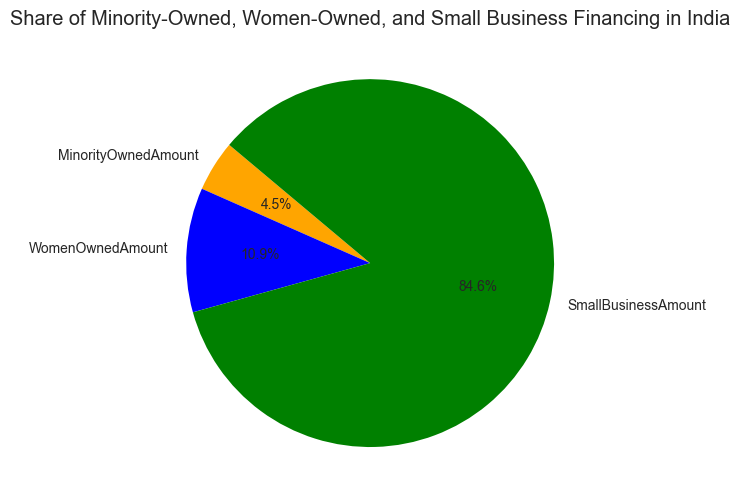

Category Shares in India (%):
MinorityOwnedAmount    4.49
WomenOwnedAmount      10.93
SmallBusinessAmount   84.58
dtype: float64


In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Filter only India
india_df = df[df['Country'] == 'India']

# Step 2: Sum up the amounts for each category
shares = india_df[['MinorityOwnedAmount', 'WomenOwnedAmount', 'SmallBusinessAmount']].sum()

# Step 3: Calculate percentages
total = shares.sum()
percentages = (shares / total) * 100

# Step 4: Plot pie chart
fig, ax = plt.subplots(figsize=(7, 7))
colors = ['orange', 'blue', 'green']
wedges, texts, autotexts = ax.pie(shares, labels=shares.index, autopct='%1.1f%%',
                                  colors=colors, startangle=140, textprops={'fontsize': 10})

plt.title("Share of Minority-Owned, Women-Owned, and Small Business Financing in India")
plt.tight_layout()
plt.show()

# Step 5: Print percentages for clarity
print("Category Shares in India (%):")
print(percentages.round(2))

Small businesses receive the majority of financing (84.6%).

Women‑owned businesses get a smaller share (10.9%).

Minority‑owned businesses receive the least (4.5%).

Support in India is heavily focused on small businesses, while women‑ and minority‑owned businesses get much less.

**4.9 Top 5 Products Exported to India**

It shows the five product categories that appear most frequently in export deals in India. It’s a way to highlight which industries or goods are most actively traded with India through export financing.


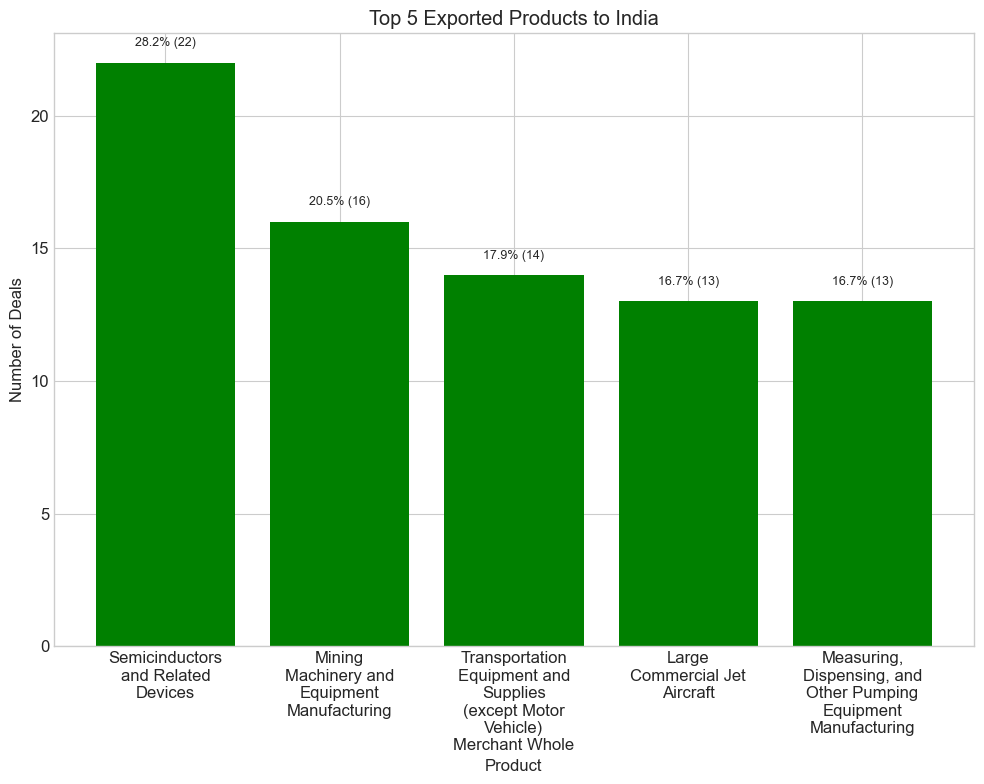

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Step 1: Filter only India
india_df = df[df['Country'] == 'India']

# Step 2: Get top 5 products by number of deals
top_products_india = india_df['ProductDescription'].value_counts().nlargest(5)

# Step 3: Calculate total for percentage labels
total_deals = top_products_india.sum()
percentages = (top_products_india / total_deals) * 100

# Step 4: Wrap long labels for better alignment
wrapped_labels = [textwrap.fill(label, width=15) for label in top_products_india.index]

# Step 5: Plot bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(wrapped_labels, top_products_india.values, color='green')

# Step 6: Add percentage + count labels above each bar
for bar, pct, count in zip(bars, percentages, top_products_india.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{pct:.1f}% ({count})', ha='center', va='bottom', fontsize=9)

# Step 7: Final layout adjustments
plt.title("Top 5 Exported Products to India")
plt.xlabel("Product")
plt.ylabel("Number of Deals")
plt.xticks(rotation=0)  # Already wrapped, no need to rotate
plt.tight_layout()
plt.show()

Semiconductors and Related Devices lead exports with 28.2% (22 deals).

Mining Machinery and Equipment follows at 20.5% (16 deals).

Transportation Equipment (non‑motor vehicles) accounts for 17.9% (14 deals).

Large Commercial Jet Aircraft and Pumping Equipment Manufacturing each make up 16.7% (13 deals).

India imports a mix of technology, machinery, and aviation products, with semiconductors slightly leading.

**4.10 Interest Rate Distribution by Loan Duration in India**

It will analyze how InterestRate varies with LoanDuration for India. This will help us to see the distribution, median, and outliers across different loan durations.

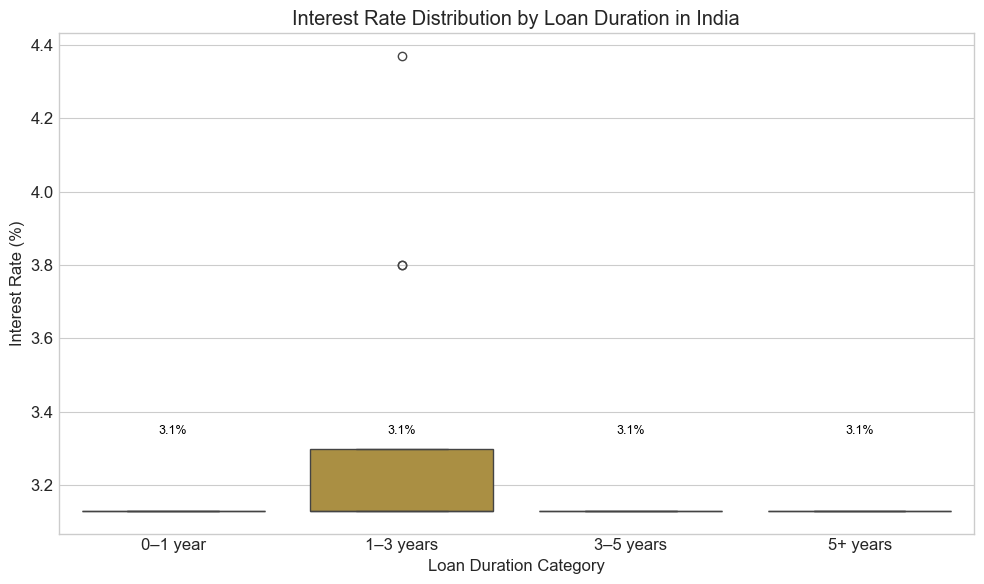

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Safe filtering
india_loans = df[df['Country'] == 'India'].copy()

# Step 2: Bin LoanDuration into year-based categories
bins = [0, 1, 3, 5, 10]  # years
labels = ['0–1 year', '1–3 years', '3–5 years', '5+ years']
india_loans.loc[:, 'DurationCategory'] = pd.cut(india_loans['LoanDuration'], 
                                                 bins=[b*12 for b in bins], 
                                                 labels=labels, right=True)

# Step 3: Box plot with hue and no legend
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=india_loans, x='DurationCategory', y='InterestRate', 
                 hue='DurationCategory', dodge=False, legend=False)

# Step 4: Fix groupby warning by setting observed=True
medians = india_loans.groupby('DurationCategory', observed=True)['InterestRate'].median()

# Step 5: Add median labels as percentages
for i, median in enumerate(medians):
    ax.text(i, median + 0.2, f"{median:.1f}%", ha='center', va='bottom', fontsize=9, color='black')

# Step 6: Final layout
plt.title("Interest Rate Distribution by Loan Duration in India")
plt.xlabel("Loan Duration Category")
plt.ylabel("Interest Rate (%)")
plt.tight_layout()
plt.show()

All four categories, 0–1 year, 1–3 years, 3–5 years, and 5+ years show a median interest rate of 3.1%.

Short‑term loans (0–1 year) show less variation, staying close to the median.

1–3 year loans have the widest spread, with some outliers reaching 3.8%–4.4%, meaning more variability in rates.

3–5 year and 5+ year loans are more stable, with narrower ranges.

Short and long loans in India are fairly consistent in interest rates but mid‑term loans (1–3 years) show more fluctuation, it is maybe higher risk or market uncertainty.

***Reviewing the Steps Completed Above***: 

The analysis reveals a highly stable lending environment in India, with interest rates tightly clustered around 3.1% across all loan durations. Only the 1–3 year category shows slight variability, suggesting occasional exceptions or negotiated terms. Loan durations are mostly short-term, peaking around 365 days, though some negative values indicate data anomalies. Approved loan amounts are heavily skewed toward smaller values, with 99.74% of loans falling in the lowest bracket. The approval rate is overwhelmingly high (99.99%), showing a strong bias toward approval. Export financing is concentrated in a few countries, with the U.S. and Mexico leading, while India ranks third. Within India, small businesses receive the majority of support (84.6%), followed by women-owned (10.9%) and minority-owned (4.5%) enterprises. The top exported products to India include aircraft, lumber, and industrial machinery, reflecting demand for capital goods. Program-wise, Insurance dominates loan counts, while Working Capital and Guarantee programs show significant financial activity. Overall, the EDA highlights consistent interest rates, concentrated approvals, inclusive support for small businesses, and strategic export flows. it painting a clear picture of India’s financing landscape in exporting.